In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("D:\\csv files\\tips.csv")

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\soni2\AppData\Local\Temp\ipykernel_17228\3688556819.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tip'])
C:\Users\soni2\AppData\Local\Temp\ipykernel_17228\3688556819.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["size"])


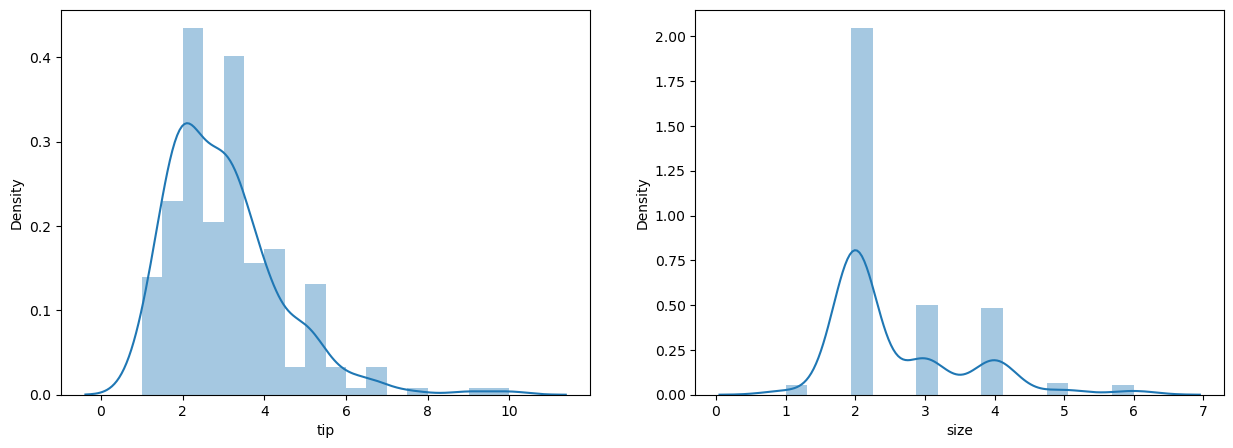

In [5]:
plt.figure(figsize= (15,5))
plt.subplot(121)
sns.distplot(df['tip'])
plt.subplot(122)
sns.distplot(df["size"])
plt.show()

<Axes: xlabel='tip'>

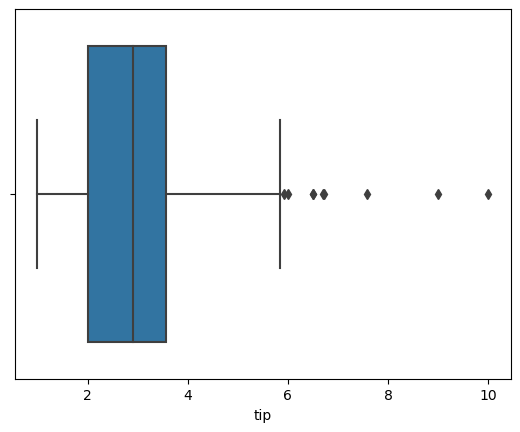

In [6]:
sns.boxplot(x = df["tip"])

In [7]:
p25 = df['tip'].quantile(0.25)
p75 = df['tip'].quantile(0.75)

In [8]:
iqr = p75 -p25

In [9]:
iqr

1.5625

In [10]:
ul = p75 + 1.5*iqr
ll = p25 - 1.5*iqr

In [11]:
ul

5.90625

In [12]:
ll

-0.34375

In [13]:
df[df['tip'] > ul ] 

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


# trimming

In [14]:
newdf = df[df['tip'] < ul]

In [15]:
newdf

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


C:\Users\soni2\AppData\Local\Temp\ipykernel_17228\2934721475.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tip'])
C:\Users\soni2\AppData\Local\Temp\ipykernel_17228\2934721475.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf['tip'])


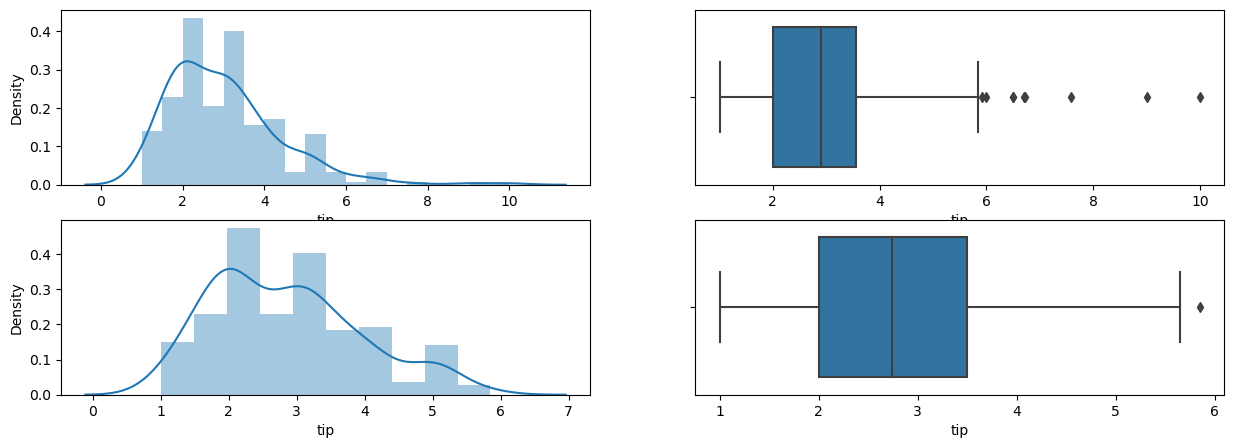

In [16]:
plt.figure(figsize = (15,5))
plt.subplot(221)
sns.distplot(df['tip'])

plt.subplot(222)
sns.boxplot(x = df["tip"])

plt.subplot(223)
sns.distplot(newdf['tip'])

plt.subplot(224)
sns.boxplot( x = newdf['tip'])

plt.show()

In [17]:
new_df_cap = df.copy()

In [18]:
new_df_cap['tip'] = np.where(
    df["tip"] > ul ,
    ul ,
    
    np.where(
    df['tip'] < ll ,
    ll,
    new_df_cap['tip'])
)

In [19]:
new_df_cap

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01000,Female,No,Sun,Dinner,2
1,10.34,1.66000,Male,No,Sun,Dinner,3
2,21.01,3.50000,Male,No,Sun,Dinner,3
3,23.68,3.31000,Male,No,Sun,Dinner,2
4,24.59,3.61000,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.90625,Male,No,Sat,Dinner,3
240,27.18,2.00000,Female,Yes,Sat,Dinner,2
241,22.67,2.00000,Male,Yes,Sat,Dinner,2
242,17.82,1.75000,Male,No,Sat,Dinner,2


C:\Users\soni2\AppData\Local\Temp\ipykernel_17228\3918508835.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tip'])
C:\Users\soni2\AppData\Local\Temp\ipykernel_17228\3918508835.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['tip'])


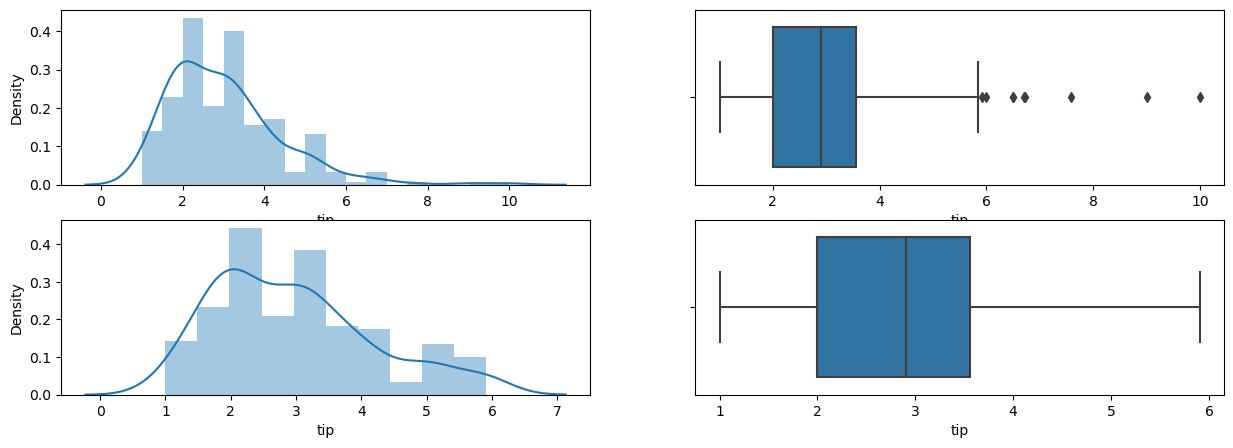

In [20]:
plt.figure(figsize = (15,5))
plt.subplot(221)
sns.distplot(df['tip'])

plt.subplot(222)
sns.boxplot(x = df["tip"])

plt.subplot(223)
sns.distplot(new_df_cap['tip'])

plt.subplot(224)
sns.boxplot(  x = new_df_cap['tip'])

plt.show()